<a href="https://colab.research.google.com/github/lloydkwak/-Introduction-to-Artificial-Intelligence/blob/main/_ai2025_assignment_cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [ ]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [ ]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [ ]:
import tensorflow as tf

# Data loading and preprocessing from previous cells
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)), # Explicit Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Adjusted dropout rate

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Increased filters
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Increased filters
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Adjusted dropout rate

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Third convolutional block
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Third convolutional block
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3), # Dropout for the third block

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4), # Adjusted dropout rate for dense layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.3871 - loss: 1.8943 - val_accuracy: 0.6082 - val_loss: 1.1348
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6504 - loss: 0.9933 - val_accuracy: 0.7145 - val_loss: 0.8233
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7174 - loss: 0.8069 - val_accuracy: 0.7452 - val_loss: 0.7481
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7519 - loss: 0.7137 - val_accuracy: 0.7849 - val_loss: 0.6178
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7855 - loss: 0.6243 - val_accuracy: 0.7810 - val_loss: 0.6211
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8067 - loss: 0.5615 - val_accuracy: 0.7793 - val_loss: 0.6394
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8231 - loss: 0.5113 - val_accuracy: 0.7608 - val_loss: 0.7468
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8382 - loss: 

## Evaluate neural network performance


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.8755 - loss: 0.4937


[0.49372798204421997, 0.8755000233650208]

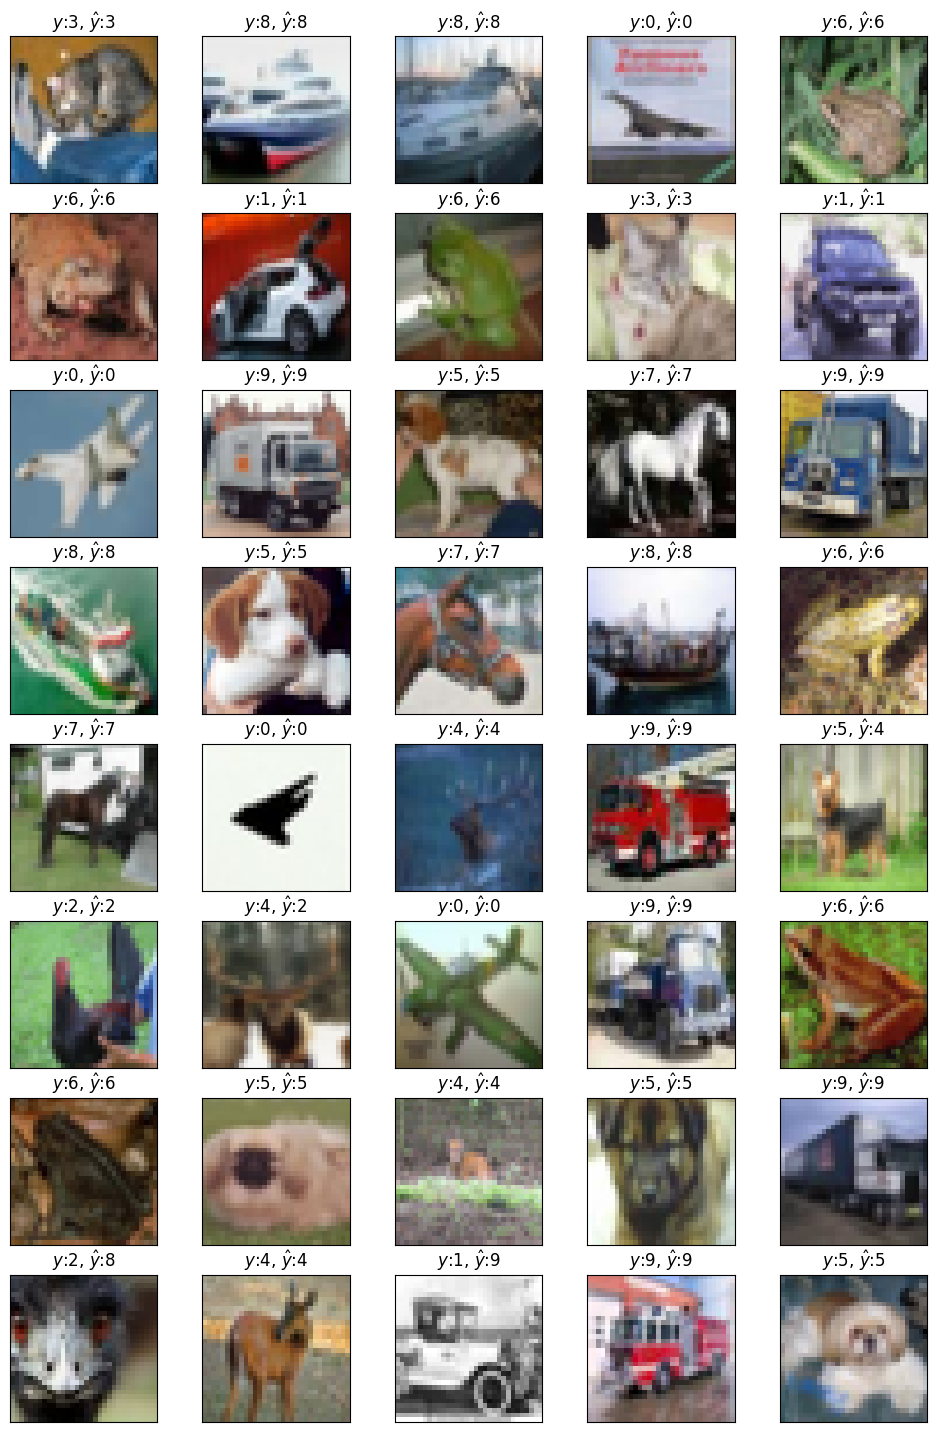

In [ ]:
prob = model.predict(x_test[0:40, :], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
  subplot = fig.add_subplot(8, 5, i + 1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  string = r'$\hat{y}$'
  subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')

  subplot.imshow(tf.squeeze(x_test[i]), cmap=plt.cm.gray_r)
plt.show()


# Task
Improve the provided CNN model for CIFAR-10 classification by modifying its architecture to include additional convolutional layers and increased filters, and integrate data augmentation techniques such as RandomFlip and RandomRotation. Then, retrain the model and evaluate its performance on the test set, aiming to achieve a test accuracy of 75% or higher. Finally, summarize the architectural changes, the data augmentation applied, and the final test accuracy achieved.

## Modify CNN Model Architecture

### Subtask:
Improve the current CNN model by modifying its architecture. This will involve adding more convolutional layers, increasing the number of filters in some layers, and potentially adjusting dropout rates to enhance model capacity and reduce overfitting. The input layer and output layer will remain the same.


**Reasoning**:
The subtask requires modifying the CNN model architecture by adding more convolutional layers, increasing filters, and adjusting dropout rates. This will be implemented in a new code block that redefines the model, compiles it, and trains it with the updated architecture.

